<b>Context:</b>

The original dataset contains about 5645 patient records covering clinical information presented as a set of 111 variables.
More specifically, in addition to patient features such as 'PatientID', 'Patient age quantile', 'SARS-Cov-2 exam result', 'Patient admitted to regular ward', 'Patient admitted to semi-intensive unit', and 'Patient admitted to intensive care unit', the features are represented in six groups of test results for COVID-19. These six groups are Respiratory test, Regular blood test, Liver kidney gas test, Urine test, Bone marrow cells test, and Influenza rapid test.
Suppose the hospital is only interested in knowing more about the impact of "regular blood test" and "influenza rapid test" group variables. Therefore, your analysis should be focused on the variables of these two groups only in addition to 'Patient age quantile'. The target variable should be set to the 'SARS-Cov-2 exam result' variable.
1. Regular blood test: ['Proteina C reativa', 'Neutrophils', 'Mean platelet volume', 'Monocytes', 'Red blood cell distribution width', 'Red blood Cells', 'Platelets', 'Eosinophils', 'Basophils', 'Leukocytes', 'Mean corpuscular hemoglobin', 'Mean corpuscular volume', 'Mean corpuscular hemoglobin concentration ', 'Lymphocytes', 'Hemoglobin', 'Hematocrit']
2. Influenza rapid test: ['Influenza B rapid test', 'Influenza A rapid test']

In [1]:
#---------------------------------------------Importing Required Libraries-----------------------------------
%matplotlib inline

import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier

import numpy as np
import pandas as pd
import seaborn as sns

sns.set(color_codes=True)

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split #--------------splitting data into test and train
from sklearn.tree import DecisionTreeClassifier #-----------Building decision tree model

from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix #-----model validation scores
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from IPython.display import display #---------------------for displaying multiple data frames in one output

from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step

import missingno as msno_plot #--------------plotting missing values

C:\Users\91905\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Reading the Dataset

In [2]:
#----------------------------------Reading the dataset--------------------------------------------
#---------------------------------While reading the data, a Unicode Decode Error happened, hence using encoding option below to avoid the Unicode error----

df = pd.read_csv('covid_hospitalization_sample.csv', encoding= 'unicode_escape')

print("Shape of the data:", df.shape)

display(df.head())

Shape of the data: (1230, 111)


,Patient ID,Patient age quantile,SARS-Cov-2 exam result,Patient addmited to regular ward,Patient addmited to semi-intensive unit,Patient addmited to intensive care unit,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation_arterial blood gases,pCO2_arterial blood gas analysis,Base excess_arterial blood gas analysis,pH_arterial blood gas analysis,Total CO2_arterial blood gas analysis,HCO3_arterial blood gas analysis,pO2_arterial blood gas analysis,Arteiral Fio2,Phosphor,ctO2_arterial blood gas analysis
0,9abc76405794c6d,9,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01d324f278f3101,16,negative,0,0,0,0.671398,0.290940,0.135801,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b2fb9312efbadc1,9,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,eb5ef46a892698f,0,negative,0,0,0,-0.152590,-0.460932,1.065375,-0.438097,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,a713345aef928fa,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observation:

1. While importing the file some non-ASCII characters couldn't be encoded or decoded, hence unicode_escape is used in the encoding options
2. Dataset contains 1230 patient records (rows) across 111 attributes (columns)

#### Filtering columns required for the analysis. 

Regular blood test and influenza rapid test group variables along with target variable - 'SARS-Cov-2 exam result' and Patient age quantile

In [3]:
#----------------------Columns outlined under Regular Blood Test and Influenza rapid test are considered---------------
data_covid_req=df[['SARS-Cov-2 exam result','Patient age quantile','Proteina C reativa', 'Neutrophils', 'Mean platelet volume', 'Monocytes',\
                   'Red blood cell distribution width', 'Red blood Cells', 'Platelets', 'Eosinophils',\
                   'Basophils', 'Leukocytes', 'Mean corpuscular hemoglobin', 'Mean corpuscular volume',\
                   'Mean corpuscular hemoglobin concentration', 'Lymphocytes', 'Hemoglobin', 'Hematocrit', \
                   'Influenza B rapid test', 'Influenza A rapid test']]

data_covid_req.head()

,SARS-Cov-2 exam result,Patient age quantile,Proteina C reativa,Neutrophils,Mean platelet volume,Monocytes,Red blood cell distribution width,Red blood Cells,Platelets,Eosinophils,Basophils,Leukocytes,Mean corpuscular hemoglobin,Mean corpuscular volume,Mean corpuscular hemoglobin concentration,Lymphocytes,Hemoglobin,Hematocrit,Influenza B rapid test,Influenza A rapid test
0,negative,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive,negative
1,negative,16,-0.316791,-0.356851,0.010677,1.250496,-0.182790,0.525133,0.135801,-0.624811,0.081693,-0.653951,-0.501356,0.086074,-1.249524,0.173372,0.290940,0.671398,positive,negative
2,negative,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive,negative
3,negative,0,-0.342622,NaN,-0.438097,-1.270772,0.613318,0.472242,1.065375,-0.835508,-1.140144,-0.080696,-1.651331,-1.255906,-1.249524,3.764100,-0.460932,-0.152590,positive,negative
4,negative,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive,negative


In [4]:
#-------------------------------Checking data type and number of missing values from the columns----------------------
data_covid_req.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   SARS-Cov-2 exam result                     1230 non-null   object 
 1   Patient age quantile                       1230 non-null   int64  
 2   Proteina C reativa                         175 non-null    float64
 3   Neutrophils                                179 non-null    float64
 4   Mean platelet volume                       200 non-null    float64
 5   Monocytes                                  202 non-null    float64
 6   Red blood cell distribution width          202 non-null    float64
 7   Red blood Cells                            202 non-null    float64
 8   Platelets                                  202 non-null    float64
 9   Eosinophils                                202 non-null    float64
 10  Basophils               

#### Data Imputation

1. There are three object variables and rest are of float data types, hence converting object variables to binary of 1 and 0
2. A lot of missing values are observed in the independent variable. Hence before performing a missing value treatment, a quick plot will give us an estimate of what % of values are missing

In [5]:
#-----------------------------Target column - 'SARS-Cov-2 exam result', converting positive to 1 and negative to 0-------

data_covid_req['SARS-Cov-2 exam result'] = data_covid_req['SARS-Cov-2 exam result'].map({'positive': 1, 'negative': 0})
data_covid_req['Influenza B rapid test'] = data_covid_req['Influenza B rapid test'].map({'positive': 1, 'negative': 0})
data_covid_req['Influenza A rapid test'] = data_covid_req['Influenza A rapid test'].map({'positive': 1, 'negative': 0})
data_covid_req['Influenza A rapid test']=data_covid_req['Influenza A rapid test'].astype('category')
data_covid_req['Influenza B rapid test']=data_covid_req['Influenza B rapid test'].astype('category')
display(data_covid_req.head())
display(data_covid_req.info())

,SARS-Cov-2 exam result,Patient age quantile,Proteina C reativa,Neutrophils,Mean platelet volume,Monocytes,Red blood cell distribution width,Red blood Cells,Platelets,Eosinophils,Basophils,Leukocytes,Mean corpuscular hemoglobin,Mean corpuscular volume,Mean corpuscular hemoglobin concentration,Lymphocytes,Hemoglobin,Hematocrit,Influenza B rapid test,Influenza A rapid test
0,0,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
1,0,16,-0.316791,-0.356851,0.010677,1.250496,-0.182790,0.525133,0.135801,-0.624811,0.081693,-0.653951,-0.501356,0.086074,-1.249524,0.173372,0.290940,0.671398,1.0,0.0
2,0,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
3,0,0,-0.342622,NaN,-0.438097,-1.270772,0.613318,0.472242,1.065375,-0.835508,-1.140144,-0.080696,-1.651331,-1.255906,-1.249524,3.764100,-0.460932,-0.152590,1.0,0.0
4,0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   SARS-Cov-2 exam result                     1230 non-null   int64   
 1   Patient age quantile                       1230 non-null   int64   
 2   Proteina C reativa                         175 non-null    float64 
 3   Neutrophils                                179 non-null    float64 
 4   Mean platelet volume                       200 non-null    float64 
 5   Monocytes                                  202 non-null    float64 
 6   Red blood cell distribution width          202 non-null    float64 
 7   Red blood Cells                            202 non-null    float64 
 8   Platelets                                  202 non-null    float64 
 9   Eosinophils                                202 non-null    float64 
 10  Basophils   

None

In [6]:
#-------------------------------------Describe is used to understand the summary statistics------------------------------
data_covid_req.describe().round(2)

,SARS-Cov-2 exam result,Patient age quantile,Proteina C reativa,Neutrophils,Mean platelet volume,Monocytes,Red blood cell distribution width,Red blood Cells,Platelets,Eosinophils,Basophils,Leukocytes,Mean corpuscular hemoglobin,Mean corpuscular volume,Mean corpuscular hemoglobin concentration,Lymphocytes,Hemoglobin,Hematocrit
count,1230.00,1230.00,175.00,179.00,200.00,202.00,202.00,202.00,202.00,202.00,202.00,202.00,202.00,202.00,202.00,202.00,202.00,202.00
mean,0.45,9.43,0.12,0.10,0.09,0.35,-0.13,0.15,-0.38,-0.26,-0.11,-0.34,0.02,0.01,0.03,-0.14,0.17,0.17
std,0.50,5.61,1.04,0.97,0.95,1.09,0.78,0.89,0.73,0.84,0.79,0.91,0.92,0.96,0.86,0.98,0.85,0.86
min,0.00,0.00,-0.54,-3.34,-1.90,-2.06,-1.33,-1.91,-2.06,-0.84,-1.14,-1.66,-5.52,-5.10,-3.44,-1.78,-2.15,-2.42
25%,0.00,5.00,-0.46,-0.44,-0.55,-0.46,-0.63,-0.41,-0.81,-0.75,-0.53,-0.89,-0.40,-0.47,-0.55,-0.82,-0.46,-0.45
50%,0.00,9.00,-0.28,0.11,0.01,0.23,-0.18,0.12,-0.45,-0.54,-0.22,-0.55,0.13,0.06,-0.05,-0.24,0.26,0.24
75%,1.00,14.00,0.17,0.68,0.68,1.01,0.26,0.82,0.07,-0.09,0.39,-0.04,0.54,0.57,0.64,0.41,0.84,0.83
max,1.00,19.00,5.95,2.09,3.71,3.64,4.95,2.98,1.76,6.92,3.14,4.46,1.90,2.11,3.33,3.76,2.05,2.09


#### Finding missing value for every column

Instead of looking at the absolute values, checking % of values that are missing

In [7]:
data_covid_req.isnull().sum()/data_covid_req['Patient age quantile'].count()*100

SARS-Cov-2 exam result                        0.000000
Patient age quantile                          0.000000
Proteina C reativa                           85.772358
Neutrophils                                  85.447154
Mean platelet volume                         83.739837
Monocytes                                    83.577236
Red blood cell distribution width            83.577236
Red blood Cells                              83.577236
Platelets                                    83.577236
Eosinophils                                  83.577236
Basophils                                    83.577236
Leukocytes                                   83.577236
Mean corpuscular hemoglobin                  83.577236
Mean corpuscular volume                      83.577236
Mean corpuscular hemoglobin concentration    83.577236
Lymphocytes                                  83.577236
Hemoglobin                                   83.577236
Hematocrit                                   83.577236
Influenza 

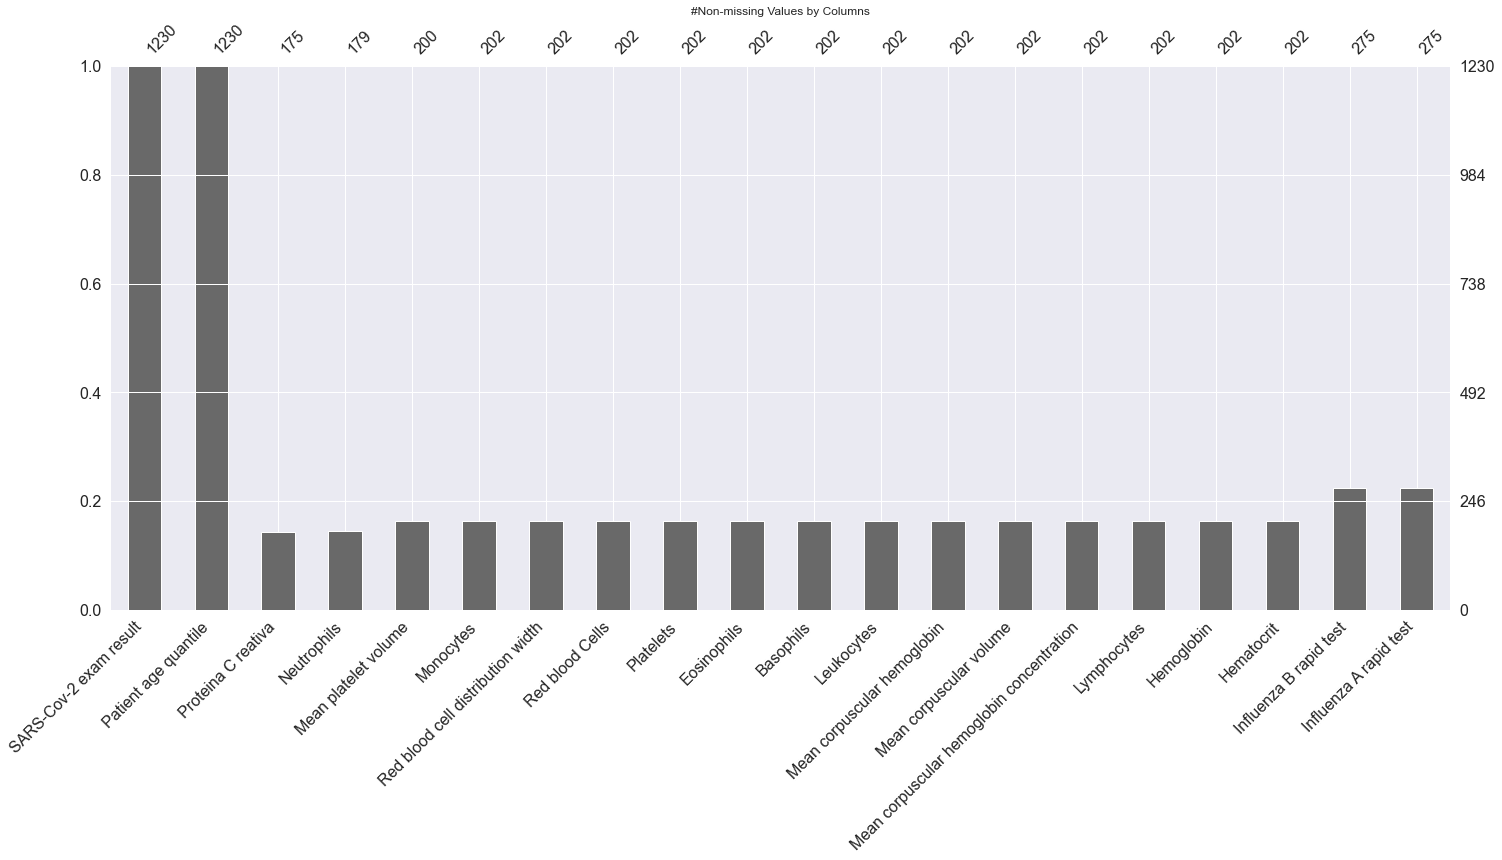

In [8]:
#-------------------------------------------Barplot of non-missing values--------------------------------
plt.title('#Non-missing Values by Columns')
msno_plot.bar(data_covid_req);

Most of the columns on an average have >77% values which are missing. It is possible that most of the missing value belongs to one type of classifier only, 0 or 1, i.e. patients tested positive or negative.

Checking distribution of missing values by target variable (patients tested postive vs. patients tested negative)

In [9]:
#-------------------Checking missing values by target variable-----------------------------
data_covid_req.drop('SARS-Cov-2 exam result', 1).isna().groupby(data_covid_req['SARS-Cov-2 exam result'], sort=False).sum().reset_index()

,SARS-Cov-2 exam result,Patient age quantile,Proteina C reativa,Neutrophils,Mean platelet volume,Monocytes,Red blood cell distribution width,Red blood Cells,Platelets,Eosinophils,Basophils,Leukocytes,Mean corpuscular hemoglobin,Mean corpuscular volume,Mean corpuscular hemoglobin concentration,Lymphocytes,Hemoglobin,Hematocrit,Influenza B rapid test,Influenza A rapid test
0,0,0.0,567.0,568.0,553.0,553.0,553.0,553.0,553.0,553.0,553.0,553.0,553.0,553.0,553.0,553.0,553.0,553.0,459.0,459.0
1,1,0.0,488.0,483.0,477.0,475.0,475.0,475.0,475.0,475.0,475.0,475.0,475.0,475.0,475.0,475.0,475.0,475.0,496.0,496.0


Observation:
1. On an average 85% of the values from the coulmns under study is missing
2. 78% is minimum percentage of nulls record observed across any of the column
3. Only target/dependent variable "SARS-Cov-2 exam result" and "Patient age quantile" have zero non-null values
4. #Missing value for both classes are similar across all the variables

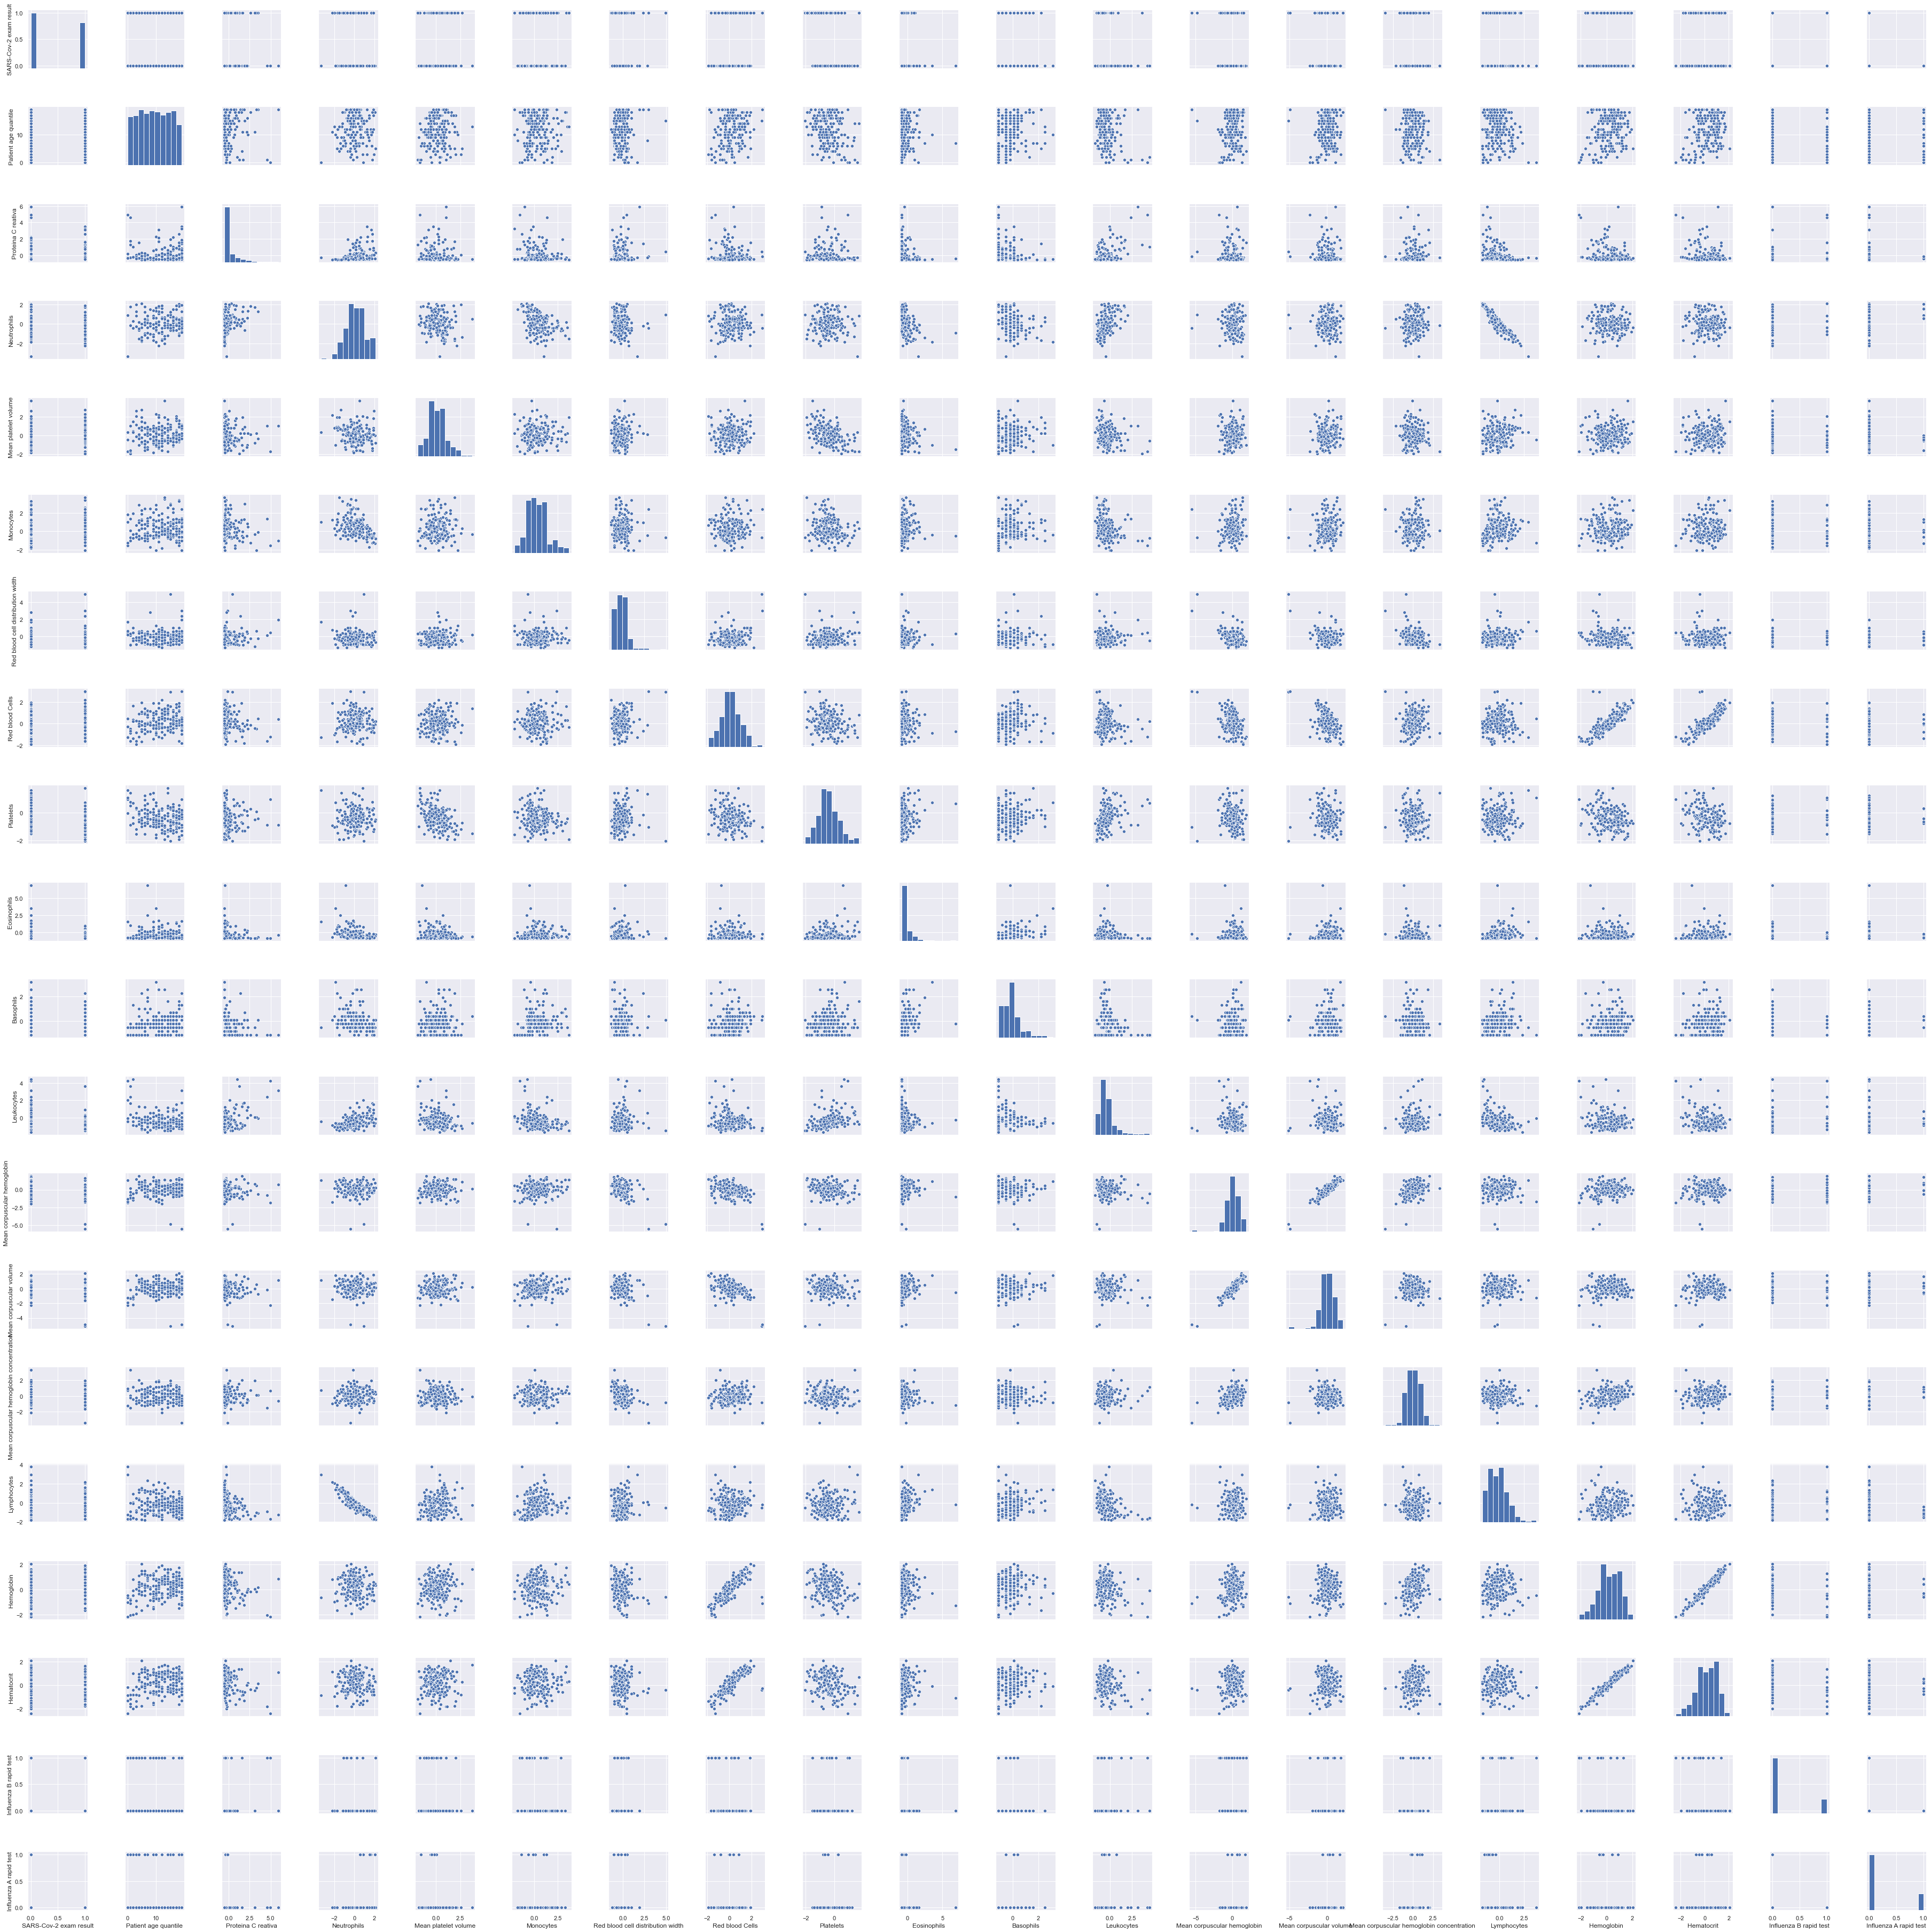

In [10]:
sns.pairplot(data_covid_req);

<b> Task 1: Preparation of data</b>

In [11]:
data_covid_req['SARS-Cov-2 exam result'].value_counts(normalize=True)

0    0.546341
1    0.453659
Name: SARS-Cov-2 exam result, dtype: float64

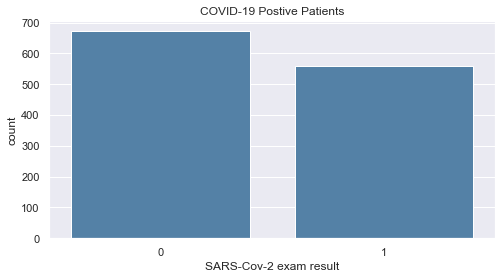

In [12]:
fig, ax = plt.subplots(figsize=(8,4)); #-----------------Setting size of the canvas

plt.title('COVID-19 Postive Patients'); #---------------------Title of the chart

sns.countplot(data_covid_req['SARS-Cov-2 exam result'],color="steelblue");

<b> Findings: </b>

1. 45% of the patients from the data are tested positive
2. Since the ratio of zeros and ones (patients tested negative and patients tested positive) are very similar 55:45, we may not need to sample or resample the data
3. However, since >77% of the values are missing, we might have to omit the null values and recheck the distribution again

<b> Data quality problems </b>

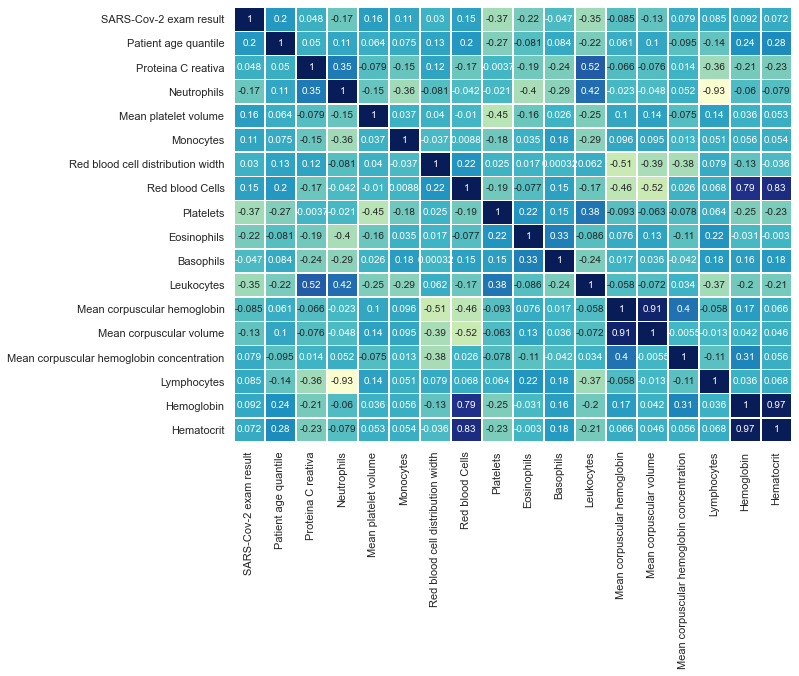

In [13]:
#-------------------------------Heat map to identify highly correlated variables-------------------------
plt.figure(figsize=(10,8))
sns.heatmap(data_covid_req.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

Correlated Variables:

1. Variables Hemoglobin & Hematocrit is highly positively correlated with Redblood cells
2. Leukocyte is highly positively correlated with Platelets
3. Neutrophils and Lymphocytes are negatively correlated and the degree of correlation is high
4. Mean corpuscular volume is highly correlated with mean corpuscular hemoglobin

In [14]:
#----------------------Dropping highly correlated variables to avoid overfitting (variables for which values are close to 1)--------------------------------
#---------------------This is done before missing value treatment as multiple columns have different number of missing values----
#---------------------We don't want to drop rows where highly correlated columns have missing values-------------

data_covid_noncorr=data_covid_req.drop(['Hemoglobin', 'Hematocrit', 'Neutrophils','Mean corpuscular volume'],axis=1)

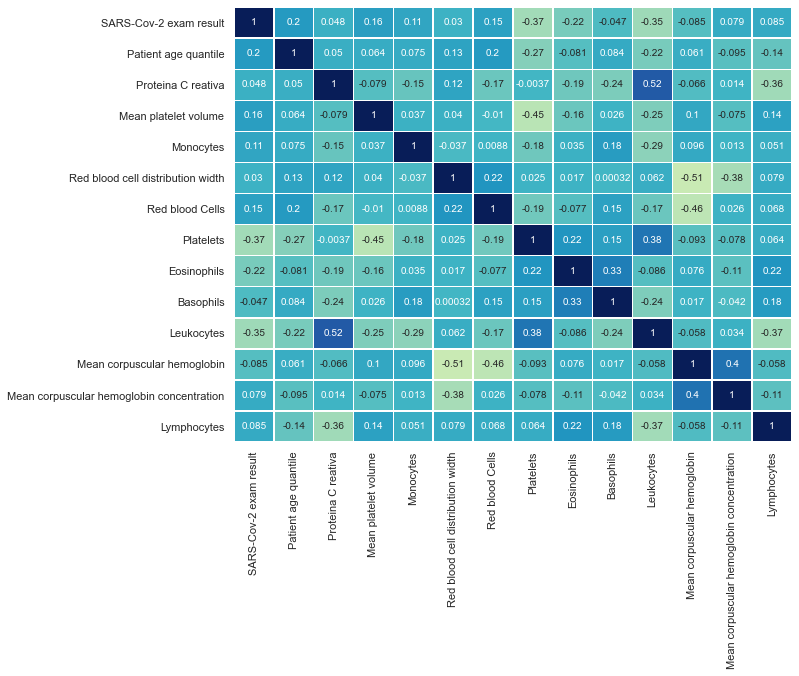

In [15]:
#-------------------------------Heat map to recheck if highly correlated variables exists-------------------------
plt.figure(figsize=(10,8))
sns.heatmap(data_covid_noncorr.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

#### Removing all columns with at least one missing value

The Kaggle website states that for every patient tested, a physician order certain tests for them based on their medical history and physical examination. The type of laboratory test is determined by the physician and depends on the individual or to a specific condition. Hence missing values doesn't mean that data is absent. The values are highly unlikely to be imputed using central tendency or by age groups, as they depend on multiple factors, hence it is ideal to remove such records to ensure an unbiased dataset.

In [16]:
#-----------------------------Dropping Missing Values-----------------------------------
data_covid_treated=data_covid_noncorr.dropna()

In [17]:
#----------------------------------------Checking the dataset after dropping rows with at-least one missing value--------
print("Shape of the data:", data_covid_treated.shape)

display(data_covid_treated.head())

Shape of the data: (80, 16)


,SARS-Cov-2 exam result,Patient age quantile,Proteina C reativa,Mean platelet volume,Monocytes,Red blood cell distribution width,Red blood Cells,Platelets,Eosinophils,Basophils,Leukocytes,Mean corpuscular hemoglobin,Mean corpuscular hemoglobin concentration,Lymphocytes,Influenza B rapid test,Influenza A rapid test
1,0,16,-0.316791,0.010677,1.250496,-0.182790,0.525133,0.135801,-0.624811,0.081693,-0.653951,-0.501356,-1.249524,0.173372,1.0,0.0
3,0,0,-0.342622,-0.438097,-1.270772,0.613318,0.472242,1.065375,-0.835508,-1.140144,-0.080696,-1.651331,-1.249524,3.764100,1.0,0.0
5,0,3,-0.396271,2.030154,0.672705,-0.978899,-1.907856,-1.534920,-0.835508,-0.529226,-0.960059,1.484965,-0.253742,-0.790410,1.0,0.0
16,0,10,-0.519466,-0.325903,1.092916,-0.448160,-1.026338,-0.278739,-0.835508,-1.140144,-0.614992,0.700891,-0.054585,0.523063,1.0,0.0
18,0,5,0.293222,-0.774677,-0.798034,-0.713529,0.190156,-0.492289,-0.329835,0.081693,-0.158615,0.230447,0.244149,-1.762721,1.0,0.0


In [18]:
data_covid_treated['SARS-Cov-2 exam result'].value_counts(normalize=True)

0    0.7375
1    0.2625
Name: SARS-Cov-2 exam result, dtype: float64

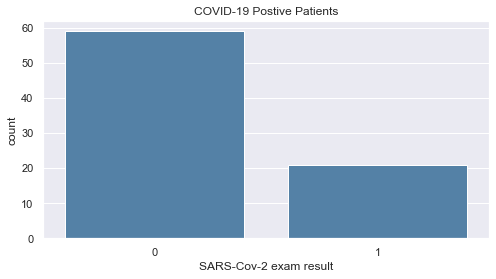

In [19]:
fig, ax = plt.subplots(figsize=(8,4)); #-----------------Setting size of the canvas

plt.title('COVID-19 Postive Patients'); #---------------------Title of the chart

sns.countplot(data_covid_treated['SARS-Cov-2 exam result'],color="steelblue");

<b>Findings (Data Treatments): </b>
1. Columns SARS-Cov-2 exam result, Influenza B rapid test, and Influenza A rapid test were converted to 0 and 1, 0 signifies negative, and 1 positive. These columns were further converted in categories for model building purpose

2. All highly correlated variables are removed from the analysis (variables with correlation closer to 1)

3. Most of the columns had at-least 77% of null values; As stated earlier, imputing missing values might not be very accurate as these test results depend on several factors and physical examination of the patients, hence patients with at least one null values in any of the attributes are removed

<b> Variables Included in the Analysis. </b>

1. Target Variable - Since the idea of the project is to predict patients tested positive with COVID-19, hence variable SARS-Cov-2 exam result is considered as the target variable.

2. Independent Variable - Highly correlated variables are removed to prevent model overfitting. Using a correlation plot following variables were observed to be highly correlated.

    Correlated Variables:

        1. Variables Hemoglobin & Hematocrit is highly positively correlated with Redblood cells
        2. Leukocyte is highly positively correlated with Platelets
        3. Neutrophils and Lymphocytes are negatively correlated and the degree of correlation is high
        4. Mean corpuscular volume is highly correlated with mean corpuscular hemoglobin

        Hence variables 'Hemoglobin', 'Hematocrit', 'Neutrophils', and 'Mean corpuscular volume' were removed from the analysis

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
#----------------------------------------------Splitting data in training and test-------------------------------------

independent_var = data_covid_treated.drop(['SARS-Cov-2 exam result'], axis=1)
dependent_var=data_covid_treated[['SARS-Cov-2 exam result']]

x_covid_train, x_covid_test, y_covid_train, y_covid_test =train_test_split(independent_var,dependent_var, test_size=.2,
                                                   random_state=22)
x_covid_train.shape,x_covid_test.shape

((64, 15), (16, 15))

<b> Using SMOTE to ensure class balance </b>

We observe a class imbalance in the data, hence using Synthetic Minority Oversampling Technique to improve the count of 1s, i.e. data points of patients who tested positive with COVID-2019

In [22]:
y_covid_train['SARS-Cov-2 exam result'].value_counts(normalize=True)

0    0.8125
1    0.1875
Name: SARS-Cov-2 exam result, dtype: float64

In [23]:
#-------------------------Creating synthetic samples of patients tested postive with COVID-19---------------------

smt = SMOTE(random_state=55)

x_covid_train_smote, y_covid_train_smote = smt.fit_sample(x_covid_train, y_covid_train)

In [24]:
x_covid_train_smote['Influenza B rapid test'].unique()

[0.0, 1.0]
Categories (2, float64): [0.0, 1.0]

<b> Task 2: Predictive modeling using Decision Tree </b> 

1. Build a decision tree using the default setting. Answer the followings:

In [25]:
#---------------------------Creating the Decision Tree Classifier--------------------------------

model_decisiontree=DecisionTreeClassifier(random_state=42) #-----random_state is used to ensure that model produces exactly same results everytime

#### Building Model on Training data

In [26]:
model_decisiontree.fit(x_covid_train_smote, y_covid_train_smote)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

#### Classification accuracy of training and test data

In [27]:
#------------------------Training accuarcy--------------------------
print("Training Accuarcy:", model_decisiontree.score(x_covid_train_smote, y_covid_train_smote))

Training Accuarcy: 1.0


In [28]:
#----------------------Test accuracy--------------------------------
print("Test Accuarcy:", model_decisiontree.score(x_covid_test, y_covid_test))

Test Accuarcy: 0.625


#### Size of the tree

In [29]:
treeObj = model_decisiontree.tree_
print ('Total Nodes:',treeObj.node_count)
print('Depth:',model_decisiontree.get_depth())
print('Total Leaves:',model_decisiontree.get_n_leaves())

Total Nodes: 19
Depth: 6
Total Leaves: 10


#### Displaying the decision tree

In [30]:
import io
from io import StringIO

In [31]:
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
import graphviz

xvar = data_covid_treated.drop('SARS-Cov-2 exam result', axis=1)
feature_cols = xvar.columns

In [32]:
dot_data = StringIO()

export_graphviz(model_decisiontree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])


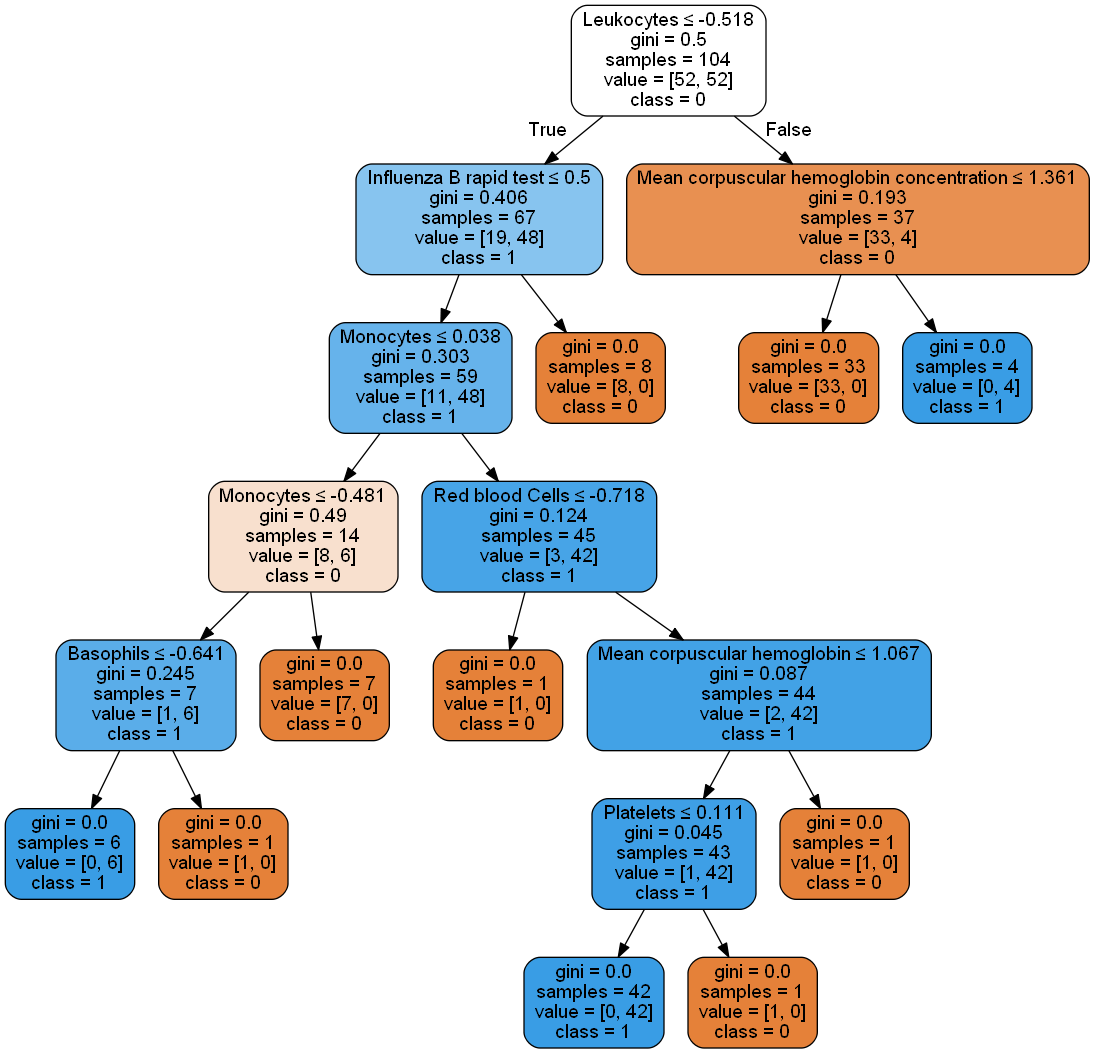

In [33]:
from pydot import graph_from_dot_data
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

<b> Variable is used for the first split and 5 major variables </b>

In [34]:
#-----------------------------------Calculating importance of different variables----------------------------

feat_importance = model_decisiontree.tree_.compute_feature_importances(normalize=False) #-----getting feature importance

feat_imp_dict = dict(zip(feature_cols, model_decisiontree.feature_importances_))

feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index') #----Converting it into data frame

feat_imp.rename(columns = {0:'FeatureImportance'}, inplace = True)

feat_imp.sort_values(by=('FeatureImportance'), ascending=False).head(5) #-----Displaying top 5 features

,FeatureImportance
Leukocytes,0.339250
Monocytes,0.203539
Influenza B rapid test,0.179338
Mean corpuscular hemoglobin concentration,0.137214
Platelets,0.037567


<b> Findings (variable used for first split and other important variables): </b>

1. Variable Leukocytes is used for the first split as it has the lowest Gini index when compared to other attributes during split one
2. Leukocytes, Monocytes, Influenza B rapid test, Mean corpuscular hemoglobin concentration	and Platelets are the 5 important variables

#### Model Parameters for building the tree

<b> Parameters used in building the tree <b>

In [35]:
model_decisiontree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

<b> Findings (Parameters used for building the tree) </b>

1. <b> criterion </b> - Gini impurity is used to decide the variables based on which root node and following decision nodes should be split
2. <b>class_weight </b> - None; All classes are assigned weight 1
3. <b>max_depth </b> - None; No pruning is done. None signifies that nodes will be expanded till all leaves are pure or all leaves have less than min_samples_split
4. <b>max_features </b> - None; All features are considered while deciding split of a node
5. <b>max_leaf_nodes </b> - None; 
6. <b>min_impurity_decrease </b> - 0.0; A node is split only when the split ensures a decrease in the impurity of greater than or equal to zero
7. <b>min_impurity_split </b> - None; 
8. <b>min_samples_leaf </b> - 1; The minimum number of samples required for a leaf node. Note by default, DecisionTreeClassifier ensures that there should be at least 1 sample in the left and right branches for a split to happen
9. <b>min_samples_split</b> - 2; Depends on min_samples_leaf
10. <b>splitter</b> - 'best'; Strategy used to choose the split at each node. Best ensure that all features are considered while deciding the split

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

<b> Building another decision tree tuned with GridSearchCV: </b>

In [36]:
from sklearn.model_selection import GridSearchCV

#### Fine-tuning Decision Tree parameters using GridSearchCV

1. The criterion of Node split is set to both Gini and entropy
2. max_leaf_nodes are set between values 2 to 10
3. Minimum reduction in impurity from parent to child is set to values between 0.0 and 0.1
4. Feature selection is set to None, auto, sqrt, log2
5. Maximum depth is tuned between 1 and 5 (model overfitting was happening as Decision Trees tend to create branches till every node os homogeneous)

In [37]:
params = {'criterion':['gini','entropy'],'max_leaf_nodes': list(range(2, 10)),\
          'min_samples_split': [2, 3, 4], 'splitter':['best','random'],\
          'min_impurity_split': [0.0,0.02,0.04,0.06,0.08,0.1],
            'max_features':[None,'auto','sqrt','log2'], 'max_depth':list(range(1,5))} #------------------Setting parameter values for Decision Tree

grid_search_model = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3) #---Cross validation is 3

grid_search_model.fit(x_covid_train_smote, y_covid_train_smote) #---------using model on training and test data

Fitting 3 folds for each of 9216 candidates, totalling 27648 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 27648 out of 27648 | elapsed:  1.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='depr...d', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                       

<b> Getting best parameter values from the Grid Search above </b>

In [38]:
grid_search_model.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [39]:
grid_search_model.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': 6,
 'min_impurity_split': 0.0,
 'min_samples_split': 2,
 'splitter': 'best'}

<b> Classification accuracy of training and test datasets </b>

In [40]:
print('Training Accuarcy:',grid_search_model.score(x_covid_train_smote, y_covid_train_smote))

Training Accuarcy: 0.9615384615384616


In [41]:
print('Test Accuarcy:',grid_search_model.score(x_covid_test, y_covid_test))

Test Accuarcy: 0.75


#### Using best fit parameters to come up with the decision tree model. This is used for visualizing the tree

In [42]:
model_decisiontree_gds=DecisionTreeClassifier(criterion='gini',
                       max_depth=4, max_leaf_nodes=6,
                       min_impurity_split=0.0,
                       min_samples_split=2,
                       random_state=42, splitter='best')

model_decisiontree_gds.fit(x_covid_train_smote, y_covid_train_smote)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

#### Visualizing the tree

In [43]:
dot_data = StringIO()

export_graphviz(model_decisiontree_gds, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])


<b> Size of the tree </b>

In [44]:
treeObj = model_decisiontree_gds.tree_
print ('Total Nodes:',treeObj.node_count)
print('Depth:',model_decisiontree_gds.get_depth())
print('Total Leaves:',model_decisiontree_gds.get_n_leaves())

Total Nodes: 11
Depth: 4
Total Leaves: 6


<b> Is the size different from the tree in the previous step? Why? </b>

GridSearchCV uses all parameter inputs provided by the user, divides the training in data K-Cross validation datasets, run all possible combinations of input parameters, and find the best fir parameter based on model accuracy. The model, when fine-tuned using GridSearchCV, reduced the number of nodes, depth of the tree, and total leaves to 11, 4 & 6 respectively. The size of the tree reduces when the number of maximum leaves allowed is reduced. Maximum leaves indicate terminal nodes, i.e. nodes without a branch.

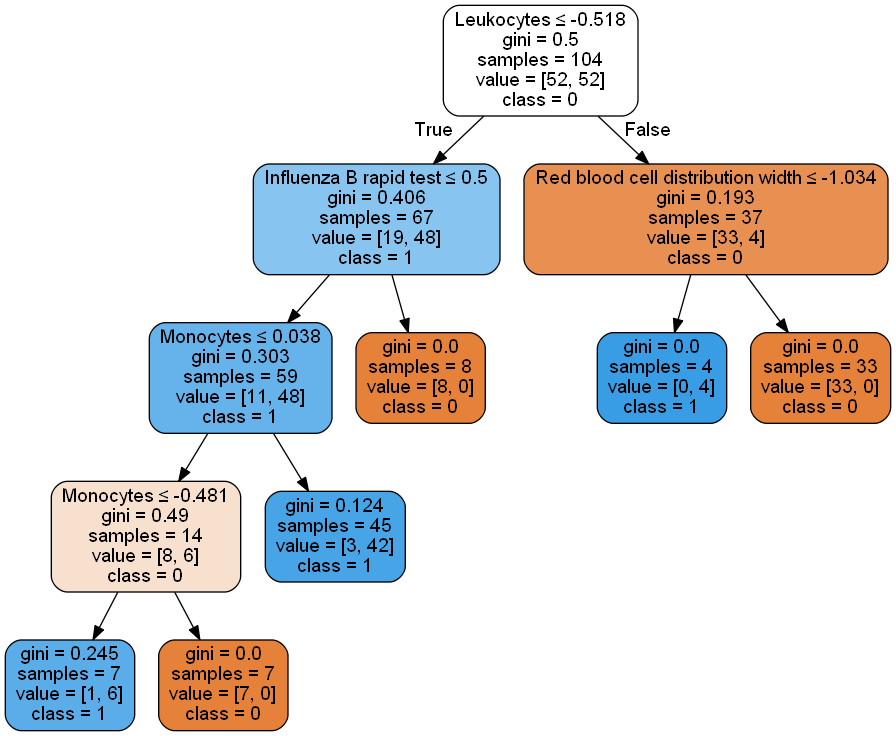

In [45]:
from pydot import graph_from_dot_data
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [46]:
#-----------------------------------Calculating importance of different variables----------------------------

feat_importance = model_decisiontree_gds.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(feature_cols, model_decisiontree_gds.feature_importances_))

feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')

feat_imp.rename(columns = {0:'FeatureImportance'}, inplace = True)

feat_imp.sort_values(by=('FeatureImportance'), ascending=False).head(5)

,FeatureImportance
Leukocytes,0.394779
Monocytes,0.236855
Influenza B rapid test,0.208693
Red blood cell distribution width,0.159674
Patient age quantile,0.000000


<b> Findings (variable used for first split and other important variables): </b>

1. Variable Leukocytes is used for the first split as it has the lowest gini index when compared to other attributes during split one
2. Leukocytes, Monocytes, Influenza B rapid test, and Red blood cell distribution width are the four most important varibles used for the split

<b> Evidence of model overfitting. </b>

After fine tuning the model using grid search, we still see evidence of model overfitting. The accuarcy scores of training and test data are 0.96 and 0.75 respective. The huge difference in accuarcy scores are a sign of model being overfitted on training data

In [47]:
model_decisiontree_gds

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

<b> Findings (Parameters used for building the tree) </b>

1. <b> criterion </b> - Gini impurity is used to decide the variables based on which root node and following decision nodes should be split
2. <b>class_weight </b> - None; All classes are assigned weight 1
3. <b>max_depth </b> - 4;
4. <b>max_features </b> - None; All features are considered while deciding split of a node
5. <b>max_leaf_nodes </b> - 6; 
6. <b>min_impurity_decrease </b> - 0.0; A node is split only when the split ensures a decrease in the impurity of greater than or equal to zero
7. <b>min_impurity_split </b> - None; 
8. <b>min_samples_leaf </b> - 1; The minimum number of samples required for a leaf node. Note by default, DecisionTreeClassifier ensures that there should be at least 1 sample in the left and right branches for a split to happen
9. <b>min_samples_split</b> - 2; Depends on min_samples_leaf
10. <b>splitter</b> - 'best'; Strategy used to choose the split at each node. Best ensure that all features are considered while deciding the split

<b> What is the difference do you see between these two decision tree models (steps 2.1 & 2.2)? How do they compare performance-wise? Produce the ROC curve for both DTs. Explain why those changes may have happened. </b>

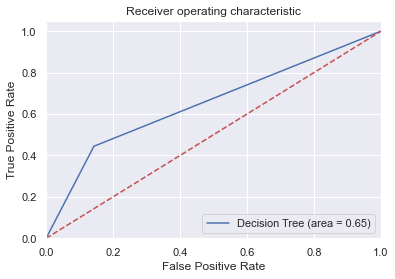

In [48]:
#AUC ROC curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


dt_roc_auc = roc_auc_score(y_covid_test, model_decisiontree.predict(x_covid_test))

fpr, tpr, thresholds = roc_curve(y_covid_test, model_decisiontree.predict_proba(x_covid_test)[:,1])

plt.figure()

plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

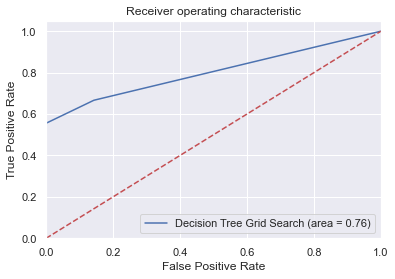

In [49]:
#AUC ROC curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


dt_roc_auc = roc_auc_score(y_covid_test, model_decisiontree_gds.predict(x_covid_test))

fpr, tpr, thresholds = roc_curve(y_covid_test, model_decisiontree_gds.predict_proba(x_covid_test)[:,1])

plt.figure()

plt.plot(fpr, tpr, label='Decision Tree Grid Search (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<b> Findings: </b>

Difference between decision tree models:

1. Size of the tree (depth, nodes, and number of leaves) are different
    - The difference in size is because of the best parameter values returned by the GridSearchCV
    
    
2. Training and test accuracies are different
    - Decision Trees tend to split a node until all nodes are homogeneous, which is a sign of model overfitting. Comparing the tree figure generated by the Decision Tree model with the default setting and the one generated using GridSearchCV we see that the number of leaf nodes in different. All leaf nodes in the figure produced by Decision Tree with default settings is homogenous hence training accuracy is higher than the other
    - The test accuracy is higher using GridSearchCV
    - Performance-wise decision tree tuned with GridSearchCV is much better as it has better accuracy on test data and a better area under the curve


3. ROC curves

    - Decision tree tuned with GridSearchCV for different probability values has a better true positive rate than false-positive rates, i.e. of all the patients predicted as being tested positive with COVID-19 most of the predictions are accurate. The model has better accuracy for training data hence we see an improved ROC and AOC


<b> Patients who could be potentially "COVID-19 Positive" and the general characteristics of those patients </b>

After fine-tuning the model using GridSearch CV accuracy of 0.75 and an AOC (area under the curve) of 0.76 is obtained which is much higher than what was observed for the Decision tree model without any parameters. Since test data is considered as a representation of future data values, good accuracy, and AOC ensures that the model can be used to identify which patients are COVID-19 Positive.

General characteristics of patients tested positive can be obtained using the decision tree representation above.
Leukocytes are part of the body's immune system. They are generally produced in the bone marrow and are found in blood and lymph tissues. Lower Leukocytes indicates a lower immune system. Patients with Leukocyte count less than -0.52 have higher chances of being tested positive. Similarly, some of the other characteristics are higher levels of monocytes (higher level of monocytes indicates chronic infection) and negative influenza B test results improve the chances of a patient being diagnosed with COVID-19